In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
train=pd.read_csv("C:/Users/Dell/Desktop/git_hub files/train.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# non stastistical columns droping
for i in train:
    print(i,len(train[i].unique()))

Id 1460
MSSubClass 15
MSZoning 5
LotFrontage 111
LotArea 1073
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 5
MasVnrArea 328
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinSF1 637
BsmtFinType2 7
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
Heating 6
HeatingQC 5
CentralAir 2
Electrical 6
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
KitchenQual 4
TotRmsAbvGrd 12
Functional 7
Fireplaces 4
FireplaceQu 6
GarageType 7
GarageYrBlt 98
GarageFinish 4
GarageCars 5
GarageArea 441
GarageQual 6
GarageCond 6
PavedDrive 3
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
PoolQC 4
Fence 5
MiscFeature 5
MiscV

In [5]:
train=train.drop("Id",axis=1)

In [6]:
# Missing data treatment

In [7]:
def filler(df):
    import pandas as pd
    Q=pd.DataFrame(df.isna().sum(),columns=["ct"])
    W=Q[Q.ct>0.7].index
    for i in W:
        if df[i].dtypes=="object":
            X=df[i].mode()[0]
            df[i]=df[i].fillna(X)
        else:
            X=df[i].mean()
            df[i]=df[i].fillna(X)

In [8]:
filler(train)

In [9]:
# train.isna().sum()

In [10]:
# Skew and Correlation

In [11]:
train.skew()["SalePrice"]

1.8828757597682129

In [12]:
k=train.skew()

<AxesSubplot:>

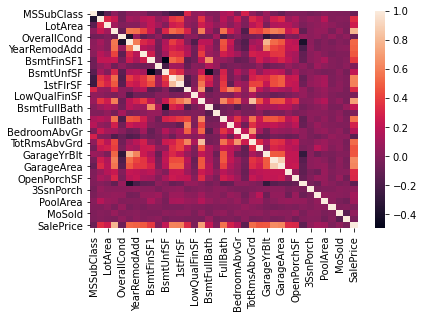

In [13]:
cor=train.corr()
sb.heatmap(cor)

In [14]:
tablue=pd.DataFrame(train.corr()["SalePrice"])

In [15]:
tablue["Skew"]=k

In [16]:
tablue.sort_values(by=["Skew"])

,SalePrice,Skew
GarageYrBlt,0.470177,-0.668175
YearBuilt,0.522897,-0.613461
YearRemodAdd,0.507101,-0.503562
GarageCars,0.640409,-0.342549
FullBath,0.560664,0.036562
YrSold,-0.028923,0.096269
GarageArea,0.623431,0.179981
BedroomAbvGr,0.168213,0.211790
MoSold,0.046432,0.212053
OverallQual,0.790982,0.216944


In [17]:
k=(tablue["Skew"])
Skew=k[k>0.7].index

In [18]:
Skew

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')

In [19]:
train=train.drop(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', ],axis=1)

In [20]:
# defining X and Y
Y=train[["SalePrice"]]
X=train.drop(["SalePrice"],axis=1)

In [21]:
# Preparing the data
con=[]
cat=[]
for i in X:
    if X[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X2=pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X1=pd.get_dummies(X[cat])
X=X2.join(X1)

In [22]:
X.head(2)

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.651479,-0.517200,1.050994,0.878668,1.107810,0.789741,1.227585,0.163779,0.912210,-0.951226,...,0,0,0,1,0,0,0,0,1,0
1,-0.071836,2.179628,0.156734,-0.429577,-0.819964,0.789741,-0.761621,0.163779,-0.318683,0.600495,...,0,0,0,1,0,0,0,0,1,0


In [23]:
from statsmodels.api import add_constant,OLS
X=add_constant(X)
ols=OLS(Y,X)
model=ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     52.04
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:15:32   Log-Likelihood:                -16835.
No. Observations:                1460   AIC:                         3.412e+04
Df Residuals:                    1236   BIC:                         3.530e+04
Df Model:                         223                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.584e+04   2890.924      5.479      0.000    1.02e+04    2.15e+04
OverallQual            1.353e+04   1603.240      8.442      0.000    1.04e+04    1.67e+04
OverallCond            5578.7445   1119.303      4.984      0.000    3382.801    7774.688
YearBuilt              4085.0868   2611.323      1.564      0.118   -1038.029    9208.202
YearRemodAdd           1869.3597   1342.708      1.392      0.164    -764.879    4503.599
BsmtFullBath           4059.5630   1027.622      3.950      0.000    2043.486    6075.640
FullBath               9459.5887   1332.287      7.100      0.000    6845.794    1.21e+04
HalfBath               4088.3705   1196.710      3.416      0.001    1740.562    6436.179
BedroomAbvGr          -1394.8500   1276.101     -1.093      0.275   -3898.413    1108.713
TotRmsAbvGrd           1.422e+04   1557.720      9.132      0.000    1.12e+04    1.73e+04
Fireplaces             6522.0854   1122.220      5.812      0.000    4320.419    8723.752
GarageYrBlt           -1742.2106   1578.316     -1.104      0.270   -4838.686    1354.264
GarageCars             1960.3848   1926.330      1.018      0.309   -1818.854    5739.623
GarageArea             8566.1197   1923.102      4.454      0.000    4793.214    1.23e+04
MoSold                -1110.1673    773.008     -1.436      0.151   -2626.720     406.386
YrSold                -1080.2295    797.466     -1.355      0.176   -2644.766     484.307
MSZoning_C (all)      -2.382e+04   9449.634     -2.521      0.012   -4.24e+04   -5280.765
MSZoning_FV            1.291e+04   6994.006      1.846      0.065    -811.494    2.66e+04
MSZoning_RH            1.093e+04   6947.685      1.574      0.116   -2696.409    2.46e+04
MSZoning_RL            9321.5896   3698.476      2.520      0.012    2065.604    1.66e+04
MSZoning_RM            6493.1923   4175.977      1.555      0.120   -1699.595    1.47e+04
Street_Grvl            2048.4224   7267.674      0.282      0.778   -1.22e+04    1.63e+04
Street_Pave            1.379e+04   6699.831      2.058      0.040     646.293    2.69e+04
Alley_Grvl             3012.9528   3037.019      0.992      0.321   -2945.330    8971.236
Alley_Pave             1.283e+04   3191.753      4.019      0.000    6564.208    1.91e+04
LotShape_IR1          -4901.1864   3025.842     -1.620      0.106   -1.08e+04    1035.168
LotShape_IR2           4659.4913   4347.840      1.072      0.284   -3870.471    1.32e+04
LotShape_IR3            2.02e+04   7578.586      2.666      0.008    5336.472    3.51e+04
LotShape_Reg          -4124.0783   3125.719     -1.319      0.187   -1.03e+04    2008.222
LandContour_Bnk        2344.4070   3641.878      0.644      0.520   -4800.539    9489.353
LandContour_HLS        5337.0677   3762.660      1.418      0.156   -2044.839    1.27e+04
LandContour_Low        

In [24]:
Q=pd.DataFrame(model.pvalues,columns=["Ct"])
W=Q[Q.Ct>0.7].index

X=X.drop(W,axis=1)

In [25]:
from statsmodels.api import add_constant,OLS
X=add_constant(X)
ols=OLS(Y,X)
model=ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     59.36
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:15:32   Log-Likelihood:                -16836.
No. Observations:                1460   AIC:                         3.407e+04
Df Residuals:                    1260   BIC:                         3.513e+04
Df Model:                         199                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.646e+04   9072.041      1.814      0.070   -1339.781    3.43e+04
OverallQual            1.349e+04   1563.310      8.632      0.000    1.04e+04    1.66e+04
OverallCond            5605.0315   1086.417      5.159      0.000    3473.645    7736.418
YearBuilt              4040.1530   2464.611      1.639      0.101    -795.041    8875.347
YearRemodAdd           1754.3391   1299.545      1.350      0.177    -795.171    4303.849
BsmtFullBath           4077.5474   1010.049      4.037      0.000    2095.983    6059.111
FullBath               9478.0926   1305.998      7.257      0.000    6915.922     1.2e+04
HalfBath               4094.2165   1171.450      3.495      0.000    1796.009    6392.424
BedroomAbvGr          -1428.9435   1252.262     -1.141      0.254   -3885.693    1027.806
TotRmsAbvGrd           1.424e+04   1526.068      9.330      0.000    1.12e+04    1.72e+04
Fireplaces             6481.2078   1102.368      5.879      0.000    4318.529    8643.886
GarageYrBlt           -1731.8856   1542.169     -1.123      0.262   -4757.387    1293.615
GarageCars             1945.4415   1886.896      1.031      0.303   -1756.362    5647.245
GarageArea             8522.5275   1889.271      4.511      0.000    4816.063    1.22e+04
MoSold                -1100.3537    759.652     -1.448      0.148   -2590.676     389.968
YrSold                -1089.1489    780.058     -1.396      0.163   -2619.504     441.207
MSZoning_C (all)      -2.412e+04   9340.535     -2.582      0.010   -4.24e+04   -5794.656
MSZoning_FV            1.334e+04   5058.419      2.638      0.008    3419.507    2.33e+04
MSZoning_RH             1.17e+04   6825.660      1.714      0.087   -1690.377    2.51e+04
MSZoning_RL            9487.4540   3795.551      2.500      0.013    2041.158    1.69e+04
MSZoning_RM            6046.2144   3915.676      1.544      0.123   -1635.749    1.37e+04
Street_Pave            1.127e+04   1.33e+04      0.849      0.396   -1.48e+04    3.73e+04
Alley_Grvl             3260.4569   5169.503      0.631      0.528   -6881.325    1.34e+04
Alley_Pave              1.32e+04   5379.571      2.453      0.014    2643.829    2.38e+04
LotShape_IR1          -4572.3389   3570.791     -1.280      0.201   -1.16e+04    2433.011
LotShape_IR2           5002.6517   4706.472      1.063      0.288   -4230.733    1.42e+04
LotShape_IR3           1.976e+04   7657.822      2.580      0.010    4735.249    3.48e+04
LotShape_Reg          -3730.8600   3671.479     -1.016      0.310   -1.09e+04    3472.026
LandContour_Bnk        3410.3857   7147.814      0.477      0.633   -1.06e+04    1.74e+04
LandContour_HLS        6344.6061   7022.184      0.904      0.366   -7431.856    2.01e+04
LandContour_Lvl        1.009e+04   6377.789      1.582      0.114   -2424.226    2.26e+04
Utilities_AllPub       

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31)

In [27]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,pred_tr)
ts_err=mean_absolute_error(ytest,pred_ts)
print(f"---==================----")
print(f"Training Error:{tr_err}")
print(f"Testing Error:{ts_err}")
if (tr_err<ts_err):
    print(f"Overfitted")
else:
    print(f"Underfitted")
print(f"---==================----")

---==================----
Training Error:16026.846746575342
Testing Error:34907274009.98288
Overfitted
---==================----


In [28]:
def mul_col(df,ycol,xcols):
    import pandas as pd
    from preprocessing_6PM import replacer
    replacer(df)
    Y=df[ycol]
    X=df[xcols]
    from preprocessing_6PM import data_prep
#     data_prep(df)
    from sklearn.model_selection import train_test_split
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31)
    from sklearn.linear_model import LinearRegression
    lm=LinearRegression()
    model=lm.fit(xtrain,ytrain)
    pred_tr=model.predict(xtrain)
    pred_ts=model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err=mean_absolute_error(ytrain,pred_tr)
    ts_err=mean_absolute_error(ytest,pred_ts)
    print(f"---=======@=@=========----")
    print(f"{ycol}~~~~{xcols}")
    print(f"Training Error:{tr_err}")
    print(f"Testing Error:{ts_err}")
    if (tr_err<ts_err):
        print(f"Overfitted")
    else:
        print(f"Underfitted")
    print(f"---=======@=@=========----")

In [29]:
mul_col(train,["SalePrice"],["OverallQual","OverallCond"])

---=======@=@=========----
['SalePrice']~~~~['OverallQual', 'OverallCond']
Training Error:33503.75711358481
Testing Error:34247.93654347757
Overfitted
---=======@=@=========----


In [30]:
con=[]
cat=[]
for i in train.columns:
    if train[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)
   

In [31]:
con

['OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'MoSold',
 'YrSold',
 'SalePrice']

In [32]:
W=[]
for i in con:
    W.append(i)
    K=mul_col(train,["SalePrice"],W)

---=======@=@=========----
['SalePrice']~~~~['OverallQual']
Training Error:33507.1897800526
Testing Error:34240.93998025396
Overfitted
---=======@=@=========----
---=======@=@=========----
['SalePrice']~~~~['OverallQual', 'OverallCond']
Training Error:33503.75711358481
Testing Error:34247.93654347757
Overfitted
---=======@=@=========----
---=======@=@=========----
['SalePrice']~~~~['OverallQual', 'OverallCond', 'YearBuilt']
Training Error:32782.45376844081
Testing Error:34530.6313449483
Overfitted
---=======@=@=========----
---=======@=@=========----
['SalePrice']~~~~['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd']
Training Error:32605.707478423923
Testing Error:34252.82461969842
Overfitted
---=======@=@=========----
---=======@=@=========----
['SalePrice']~~~~['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath']
Training Error:32095.61005102348
Testing Error:33299.444469474496
Overfitted
---=======@=@=========----
---=======@=@=========----
['SalePrice

In [33]:
# Making Ridge Model

In [34]:
a=0.001
for i in range(0,30):
    from sklearn.linear_model import Ridge
    rr=Ridge(a)
    model=rr.fit(X,Y)
    pred_tr=model.predict(xtrain)
    pred_ts=model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err=mean_absolute_error(ytrain,pred_tr)
    ts_err=mean_absolute_error(ytest,pred_ts)
    print(f"---========={a}=========----")
    print(f"Training Error:{tr_err}")
    print(f"Testing Error:{ts_err}")
    if (tr_err<ts_err):
        print(f"Overfitted")
    else:
        print(f"Underfitted")
    print(f"---==================----")
    a=a+0.005

---=========0.001=========----
Training Error:16257.174352706003
Testing Error:18429.414834461244
Overfitted
---==================----
---=========0.006=========----
Training Error:16260.739599010965
Testing Error:18431.259043742244
Overfitted
---==================----
---=========0.011=========----
Training Error:16264.206127091336
Testing Error:18433.052448738614
Overfitted
---==================----
---=========0.016=========----
Training Error:16267.578668168564
Testing Error:18434.797735755732
Overfitted
---==================----
---=========0.021=========----
Training Error:16270.89947765695
Testing Error:18436.776857222652
Overfitted
---==================----
---=========0.026000000000000002=========----
Training Error:16274.392588818662
Testing Error:18439.072529148372
Overfitted
---==================----
---=========0.031000000000000003=========----
Training Error:16277.927422101291
Testing Error:18441.435372494016
Overfitted
---==================----
---=========0.036000000000

In [35]:
# Making Lasso Model

In [36]:
a=1.00
for i in range(0,30):
    from sklearn.linear_model import Ridge
    rr=Ridge(a)
    model=rr.fit(X,Y)
    pred_tr=model.predict(xtrain)
    pred_ts=model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err=mean_absolute_error(ytrain,pred_tr)
    ts_err=mean_absolute_error(ytest,pred_ts)
    print(f"---========={a}=========----")
    print(f"Training Error:{tr_err}")
    print(f"Testing Error:{ts_err}")
    if (tr_err<ts_err):
        print(f"Overfitted")
    else:
        print(f"Underfitted")
    print(f"---==================----")
    a=a+0.025

---=========1.0=========----
Training Error:16638.493913626087
Testing Error:18674.877815999334
Overfitted
---==================----
---=========1.025=========----
Training Error:16643.736915083828
Testing Error:18677.94116435888
Overfitted
---==================----
---=========1.0499999999999998=========----
Training Error:16648.92989488067
Testing Error:18680.90867406829
Overfitted
---==================----
---=========1.0749999999999997=========----
Training Error:16654.026338629363
Testing Error:18683.892990021453
Overfitted
---==================----
---=========1.0999999999999996=========----
Training Error:16659.348541610936
Testing Error:18686.848887670116
Overfitted
---==================----
---=========1.1249999999999996=========----
Training Error:16664.53087508378
Testing Error:18689.713918092377
Overfitted
---==================----
---=========1.1499999999999995=========----
Training Error:16669.596879033532
Testing Error:18692.491391772117
Overfitted
---==================-

In [37]:
test=pd.read_csv("C:/Users/Dell/Desktop/git_hub files/test.csv")

In [38]:
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [39]:
# test.isna().sum()

In [40]:
filler(test)

In [41]:
col=list(xtest.columns)

In [42]:
col

['const',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'MoSold',
 'YrSold',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'Alley_Grvl',
 'Alley_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighbo

In [43]:
con=[]
cat=[]
for i in test:
    if test[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)

In [44]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X2=pd.DataFrame(ss.fit_transform(test[con]),columns=con)
X1=pd.get_dummies(test[cat])
X=X2.join(X1)

In [45]:
X[col]

KeyError: "['Utilities_NoSeWa', 'PoolQC_Fa', 'RoofMatl_Roll', 'GarageQual_Ex', 'Exterior1st_Stone', 'const', 'Heating_OthW', 'Condition2_RRAn', 'Condition2_RRNn', 'Condition2_RRAe', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'MiscFeature_TenC', 'Exterior2nd_Other', 'RoofMatl_Metal', 'Exterior1st_ImStucc'] not in index"

In [46]:
col_add=['const', 'OverallQual', 'OverallCond', 'YearBuilt', 'Utilities_NoSeWa', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_OthW', 'GarageQual_Ex', 'PoolQC_Fa', 'MiscFeature_TenC']

In [47]:
for i in col_add:
    X[i]=0

In [48]:
# X

In [49]:
final_pred=model.predict(X[col])

In [50]:
list(final_pred)

[array([238766.08513028]),
 array([250591.72880493]),
 array([291961.53732313]),
 array([304559.54396849]),
 array([302898.16102195]),
 array([285629.63320025]),
 array([277723.89242632]),
 array([286619.55758913]),
 array([306235.48510173]),
 array([253531.21644223]),
 array([258850.77587173]),
 array([219663.58514885]),
 array([223935.2338246]),
 array([254546.74731846]),
 array([199564.4870385]),
 array([465010.05948399]),
 array([355982.4271683]),
 array([409918.76023745]),
 array([426824.84227752]),
 array([534676.15099022]),
 array([412559.26276236]),
 array([319601.70348007]),
 array([279964.66216955]),
 array([282213.95134983]),
 array([314213.04522017]),
 array([301104.523604]),
 array([443929.26706598]),
 array([319034.30493631]),
 array([300655.09967533]),
 array([357696.10907926]),
 array([320519.94023281]),
 array([231342.82995599]),
 array([340455.0257467]),
 array([419482.79609313]),
 array([392466.30502733]),
 array([351205.21135431]),
 array([258478.49980301]),
 array(

In [51]:
test["Pred_Sale"]=final_pred

In [52]:
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Pred_Sale
0,1461,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal,238766.085130
1,1462,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal,250591.728805


In [53]:
pwd

'C:\\Users\\Dell\\Desktop\\New'

In [54]:
test[["Id","Pred_Sale"]].to_csv("C:/Users/Dell/Desktop/New/submission.csv",index=False)